In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [75]:
df_install = pd.read_csv('home-credit-default-risk\\installments_payments.csv')
df_train = pd.read_csv('home-credit-default-risk\\application_train.csv')

In [76]:
df_install

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [77]:
df_install[df_install["SK_ID_CURR"] == 100001].sort_values(by= "DAYS_INSTALMENT")

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
1761012,1851984,100001,1.0,2,-2916.0,-2916.0,3982.050,3982.050
3774071,1851984,100001,1.0,3,-2886.0,-2875.0,3982.050,3982.050
3435373,1851984,100001,1.0,4,-2856.0,-2856.0,3980.925,3980.925
1478621,1369693,100001,1.0,1,-1709.0,-1715.0,3951.000,3951.000
2568722,1369693,100001,1.0,2,-1679.0,-1715.0,3951.000,3951.000
3458712,1369693,100001,1.0,3,-1649.0,-1660.0,3951.000,3951.000
2624024,1369693,100001,2.0,4,-1619.0,-1628.0,17397.900,17397.900


In [78]:
df_install[df_install["SK_ID_CURR"] == 100001].sort_values(by= "DAYS_INSTALMENT").groupby(["SK_ID_PREV"]).last()

,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
SK_ID_PREV,,,,,,,
1369693,100001,2.0,4,-1619.0,-1628.0,17397.900,17397.900
1851984,100001,1.0,4,-2856.0,-2856.0,3980.925,3980.925


In [79]:
df_install.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


SK_ID_PREV: ID of previous credit in Home Credit related to loan in our sample         
SK_ID_CURR: ID of loan in our sample           
NUM_INSTALMENT_VERSION: Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed

NUM_INSTALMENT_NUMBER : On which installment we observe payment (lan tra gop so bao nhieu)

DAYS_INSTALMENT: When the installment of previous credit was supposed to be paid (relative to application date of current loan),time only relative to the application (ngay tra gop)       
DAYS_ENTRY_PAYMENT: When was the installments of previous credit paid actually (ngay ma khach hang that su tra)    
AMT_INSTALMENT: What was the prescribed installment amount of previous credit on this installment (luong tien tra gop dang ra khach hang phai tra)     
AMT_PAYMENT: What the client actually paid on previous credit on this installment ( luong tien tra gop ma khach hang that su tra)

In [80]:
df_install.duplicated().sum()

0

In [81]:
df_install.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [82]:
(df_install.isna().sum() / df_install.shape[0]).sort_values(ascending=False)

DAYS_ENTRY_PAYMENT        0.000214
AMT_PAYMENT               0.000214
SK_ID_PREV                0.000000
SK_ID_CURR                0.000000
NUM_INSTALMENT_VERSION    0.000000
NUM_INSTALMENT_NUMBER     0.000000
DAYS_INSTALMENT           0.000000
AMT_INSTALMENT            0.000000
dtype: float64

In [83]:
def check_missed_values(df):
    df_null_percentage = df.isnull().sum() / df.shape[0] * 100
    df_null_percentage = df_null_percentage.drop(df_null_percentage[df_null_percentage == 0].index).sort_values(ascending= False).reset_index()
    df_null_percentage.columns = ["Feature", "Percentage"]
    return df_null_percentage

null_df = check_missed_values(df_install)

<AxesSubplot:xlabel='Percentage', ylabel='Feature'>

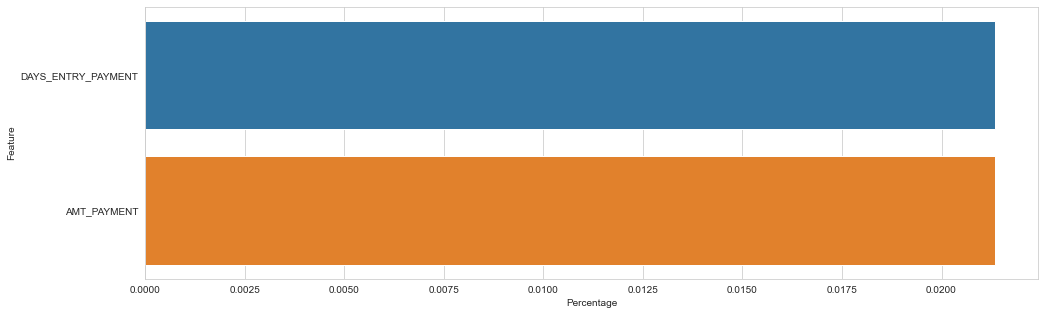

In [84]:
plt.figure(figsize=(16,5))
sns.barplot(x=  null_df["Percentage"] , y= null_df["Feature"] )

You can see in the chart is that the percentage of missing values for feature AMT_payment and Days_entry_payment is really low, we can drop them and make no impact to the result

After droped there is no missed value left

<AxesSubplot:>

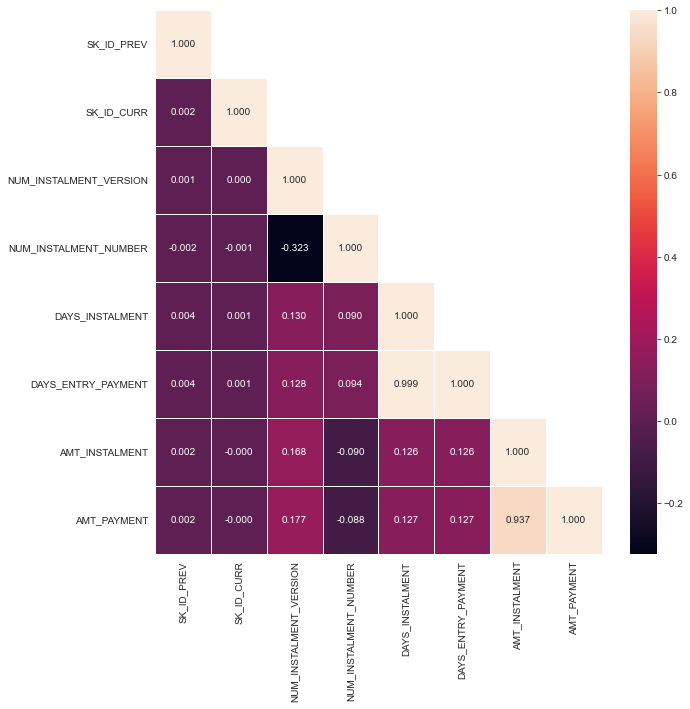

In [85]:
numeric_df = df_install._get_numeric_data()
numeric_df_corr = numeric_df.corr()
numeric_df_corr

plt.figure(figsize=(10,10))
mask = np.zeros_like(numeric_df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
sns.heatmap(numeric_df_corr,mask= mask, annot= True, fmt=".3f", linewidth=.5)

In [86]:
df_install_df = df_install.drop(["SK_ID_PREV"], axis = 1)
df_install_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   NUM_INSTALMENT_VERSION  float64
 2   NUM_INSTALMENT_NUMBER   int64  
 3   DAYS_INSTALMENT         float64
 4   DAYS_ENTRY_PAYMENT      float64
 5   AMT_INSTALMENT          float64
 6   AMT_PAYMENT             float64
dtypes: float64(5), int64(2)
memory usage: 726.6 MB


In [87]:
df_install_merged = pd.merge(df_train[['SK_ID_CURR','TARGET']], df_install, how = 'left', on=['SK_ID_CURR'])
df_install_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,100002,1,1038818.0,1.0,16.0,-115.0,-133.0,9251.775,9251.775
1,100002,1,1038818.0,1.0,8.0,-355.0,-375.0,9251.775,9251.775
2,100002,1,1038818.0,2.0,19.0,-25.0,-49.0,53093.745,53093.745
3,100002,1,1038818.0,1.0,12.0,-235.0,-250.0,9251.775,9251.775
4,100002,1,1038818.0,1.0,9.0,-325.0,-344.0,9251.775,9251.775
...,...,...,...,...,...,...,...,...,...
11607455,456255,0,1743609.0,1.0,7.0,-780.0,-781.0,11090.835,11090.835
11607456,456255,0,2631384.0,3.0,6.0,-606.0,-613.0,27489.690,27489.690
11607457,456255,0,1359084.0,1.0,7.0,-245.0,-243.0,11314.170,11314.170
11607458,456255,0,2631384.0,3.0,12.0,-426.0,-435.0,27489.690,27489.690


C:\Users\Duc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NUM_INSTALMENT_VERSION'>

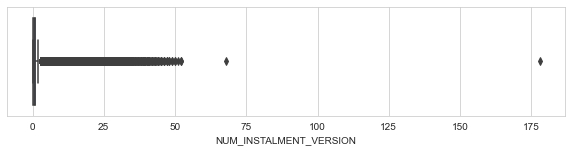

In [88]:
plt.figure(figsize=(10,2))
sns.boxplot(df_install_merged["NUM_INSTALMENT_VERSION"])

C:\Users\Duc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NUM_INSTALMENT_NUMBER'>

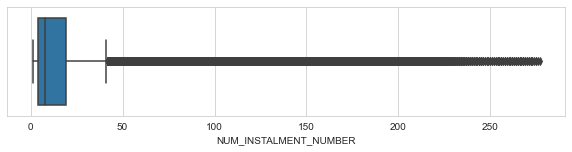

In [89]:
plt.figure(figsize=(10,2))
sns.boxplot(df_install_merged["NUM_INSTALMENT_NUMBER"])

C:\Users\Duc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_INSTALMENT'>

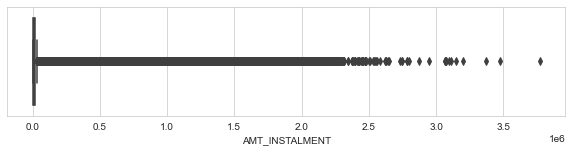

In [90]:
plt.figure(figsize=(10,2))
sns.boxplot(df_install_merged["AMT_INSTALMENT"])

C:\Users\Duc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_PAYMENT'>

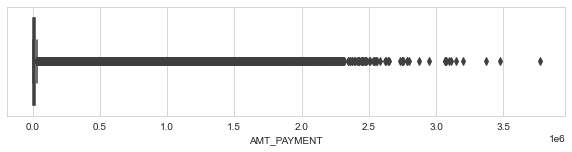

In [91]:
plt.figure(figsize=(10,2))
sns.boxplot(df_install_merged["AMT_PAYMENT"])

# Biến Categorical

C:\Users\Duc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NUM_INSTALMENT_VERSION', ylabel='count'>

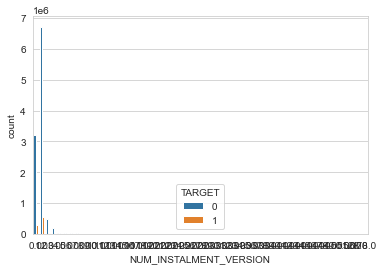

In [92]:
sns.countplot(df_install_merged["NUM_INSTALMENT_VERSION"], hue= df_install_merged["TARGET"])

array([[<AxesSubplot:title={'center':'DAYS_INSTALMENT'}>,
        <AxesSubplot:title={'center':'DAYS_ENTRY_PAYMENT'}>]],
      dtype=object)

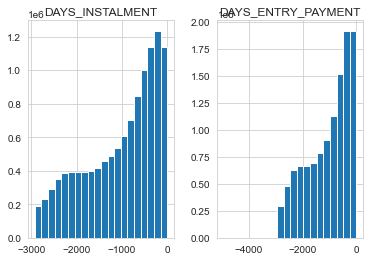

In [93]:
df_install_merged.iloc[:,5:7].hist(bins=20)

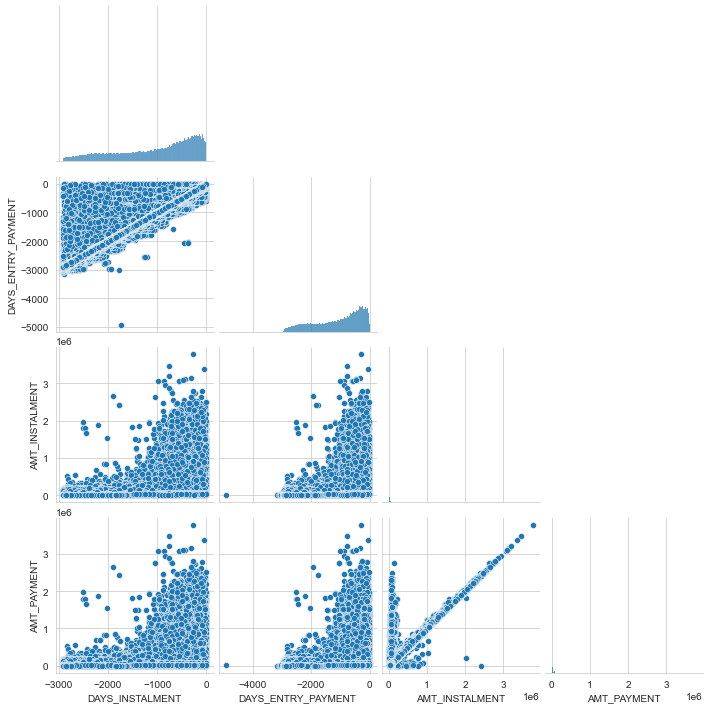

In [94]:
sns.pairplot(df_install_merged.iloc[:,5:9], corner=True)

In [95]:
df_install_merged[["SK_ID_CURR","DAYS_INSTALMENT","DAYS_ENTRY_PAYMENT"]]

,SK_ID_CURR,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT
0,100002,-115.0,-133.0
1,100002,-355.0,-375.0
2,100002,-25.0,-49.0
3,100002,-235.0,-250.0
4,100002,-325.0,-344.0
...,...,...,...
11607455,456255,-780.0,-781.0
11607456,456255,-606.0,-613.0
11607457,456255,-245.0,-243.0
11607458,456255,-426.0,-435.0


In [96]:
def convert_month(day_to_month):
    day_to_month_1 = day_to_month/30 
    return day_to_month_1
df_install_merged['DAYS_INSTALMENT'] =  df_install_merged['DAYS_INSTALMENT'].apply(convert_month)
df_install_merged['DAYS_ENTRY_PAYMENT'] = df_install_merged['DAYS_ENTRY_PAYMENT'].apply(convert_month)

In [97]:
df_install_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,100002,1,1038818.0,1.0,16.0,-3.833333,-4.433333,9251.775,9251.775
1,100002,1,1038818.0,1.0,8.0,-11.833333,-12.500000,9251.775,9251.775
2,100002,1,1038818.0,2.0,19.0,-0.833333,-1.633333,53093.745,53093.745
3,100002,1,1038818.0,1.0,12.0,-7.833333,-8.333333,9251.775,9251.775
4,100002,1,1038818.0,1.0,9.0,-10.833333,-11.466667,9251.775,9251.775
...,...,...,...,...,...,...,...,...,...
11607455,456255,0,1743609.0,1.0,7.0,-26.000000,-26.033333,11090.835,11090.835
11607456,456255,0,2631384.0,3.0,6.0,-20.200000,-20.433333,27489.690,27489.690
11607457,456255,0,1359084.0,1.0,7.0,-8.166667,-8.100000,11314.170,11314.170
11607458,456255,0,2631384.0,3.0,12.0,-14.200000,-14.500000,27489.690,27489.690


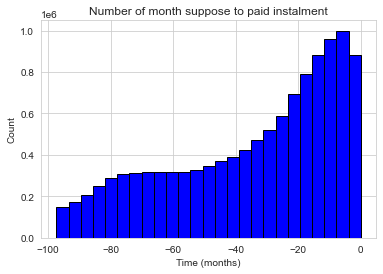

In [98]:
plt.hist(df_install_merged['DAYS_INSTALMENT'], color = 'blue', edgecolor = 'k', bins = 25)
plt.title('Number of month suppose to paid instalment'); plt.xlabel('Time (months)'); plt.ylabel('Count');

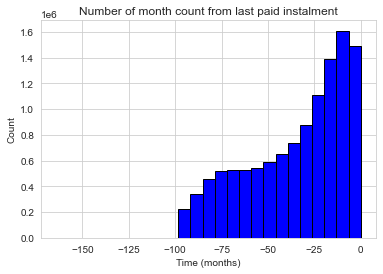

In [99]:
plt.hist(df_install_merged['DAYS_ENTRY_PAYMENT'], color = 'blue', edgecolor = 'k', bins = 25)
plt.title('Number of month count from last paid instalment'); plt.xlabel('Time (months)'); plt.ylabel('Count');

In [104]:
#add flag to indicate installment received on time and the minimum payment was received
def on_time(x):
    timely = x['DAYS_INSTALMENT'] >= x['DAYS_ENTRY_PAYMENT']
    min_met = x['AMT_PAYMENT'] >= x['AMT_INSTALMENT']

    if timely and min_met:
        return 1
    else:
        return 0

df_install_merged['TIMELY_FLAG'] = df_install_merged.apply(on_time,axis=1)

In [105]:
df_install_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,TIMELY_FLAG
0,100002,1,1038818.0,1.0,16.0,-3.833333,-4.433333,9251.775,9251.775,1
1,100002,1,1038818.0,1.0,8.0,-11.833333,-12.500000,9251.775,9251.775,1
2,100002,1,1038818.0,2.0,19.0,-0.833333,-1.633333,53093.745,53093.745,1
3,100002,1,1038818.0,1.0,12.0,-7.833333,-8.333333,9251.775,9251.775,1
4,100002,1,1038818.0,1.0,9.0,-10.833333,-11.466667,9251.775,9251.775,1
...,...,...,...,...,...,...,...,...,...,...
11607455,456255,0,1743609.0,1.0,7.0,-26.000000,-26.033333,11090.835,11090.835,1
11607456,456255,0,2631384.0,3.0,6.0,-20.200000,-20.433333,27489.690,27489.690,1
11607457,456255,0,1359084.0,1.0,7.0,-8.166667,-8.100000,11314.170,11314.170,0
11607458,456255,0,2631384.0,3.0,12.0,-14.200000,-14.500000,27489.690,27489.690,1


In [106]:
df_install_merged['TIMELY_SUM'] = df_install_merged.groupby(['SK_ID_CURR'])['TIMELY_FLAG'].transform('sum')

In [107]:
df_install_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,TIMELY_FLAG,TIMELY_SUM
0,100002,1,1038818.0,1.0,16.0,-3.833333,-4.433333,9251.775,9251.775,1,19
1,100002,1,1038818.0,1.0,8.0,-11.833333,-12.500000,9251.775,9251.775,1,19
2,100002,1,1038818.0,2.0,19.0,-0.833333,-1.633333,53093.745,53093.745,1,19
3,100002,1,1038818.0,1.0,12.0,-7.833333,-8.333333,9251.775,9251.775,1,19
4,100002,1,1038818.0,1.0,9.0,-10.833333,-11.466667,9251.775,9251.775,1,19
...,...,...,...,...,...,...,...,...,...,...,...
11607455,456255,0,1743609.0,1.0,7.0,-26.000000,-26.033333,11090.835,11090.835,1,53
11607456,456255,0,2631384.0,3.0,6.0,-20.200000,-20.433333,27489.690,27489.690,1,53
11607457,456255,0,1359084.0,1.0,7.0,-8.166667,-8.100000,11314.170,11314.170,0,53
11607458,456255,0,2631384.0,3.0,12.0,-14.200000,-14.500000,27489.690,27489.690,1,53


In [108]:
df_install_merged['INSTALLMENT_COUNT'] = df_install_merged.groupby(['SK_ID_CURR'])['TIMELY_FLAG'].transform('count')

In [109]:
df_install_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,TIMELY_FLAG,TIMELY_SUM,INSTALLMENT_COUNT
0,100002,1,1038818.0,1.0,16.0,-3.833333,-4.433333,9251.775,9251.775,1,19,19
1,100002,1,1038818.0,1.0,8.0,-11.833333,-12.500000,9251.775,9251.775,1,19,19
2,100002,1,1038818.0,2.0,19.0,-0.833333,-1.633333,53093.745,53093.745,1,19,19
3,100002,1,1038818.0,1.0,12.0,-7.833333,-8.333333,9251.775,9251.775,1,19,19
4,100002,1,1038818.0,1.0,9.0,-10.833333,-11.466667,9251.775,9251.775,1,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...
11607455,456255,0,1743609.0,1.0,7.0,-26.000000,-26.033333,11090.835,11090.835,1,53,74
11607456,456255,0,2631384.0,3.0,6.0,-20.200000,-20.433333,27489.690,27489.690,1,53,74
11607457,456255,0,1359084.0,1.0,7.0,-8.166667,-8.100000,11314.170,11314.170,0,53,74
11607458,456255,0,2631384.0,3.0,12.0,-14.200000,-14.500000,27489.690,27489.690,1,53,74


In [112]:
features = ['TIMELY_SUM','INSTALLMENT_COUNT']
df_install_merged_final = df_install_merged.groupby(['SK_ID_CURR'])[features].first().reset_index()

In [113]:
df_install_merged_final

,SK_ID_CURR,TIMELY_SUM,INSTALLMENT_COUNT
0,100002,19,19
1,100003,25,25
2,100004,3,3
3,100006,16,16
4,100007,47,66
...,...,...,...
307506,456251,7,7
307507,456252,5,6
307508,456253,12,14
307509,456254,19,19


In [114]:
df_install_merged_final['TIMELY_PERCENT'] = df_install_merged_final['TIMELY_SUM'] / df_install_merged_final['INSTALLMENT_COUNT']
df_install_merged_final['TIMELY_PERCENT'].describe()

count    307511.000000
mean          0.837770
std           0.260679
min           0.000000
25%           0.793103
50%           0.958333
75%           1.000000
max           1.000000
Name: TIMELY_PERCENT, dtype: float64

In [115]:
def payment_cat(x):
    '''Put each id into a category based timely payments rate.'''
    if x >= 0.89:
        return 'Good'
    elif x >= 0.83:
        return 'Par'
    elif x >= 0.71:
        return 'Sub_Par'
    elif x >= 0.53:
        return 'Poor'
    else:
        return 'Very_Poor'

df_install_merged_final['INSTLL_PAY_PAYMENT_GRADE'] = df_install_merged_final['TIMELY_PERCENT'].apply(payment_cat)

In [116]:
df_install_merged_final

,SK_ID_CURR,TIMELY_SUM,INSTALLMENT_COUNT,TIMELY_PERCENT,INSTLL_PAY_PAYMENT_GRADE
0,100002,19,19,1.000000,Good
1,100003,25,25,1.000000,Good
2,100004,3,3,1.000000,Good
3,100006,16,16,1.000000,Good
4,100007,47,66,0.712121,Sub_Par
...,...,...,...,...,...
307506,456251,7,7,1.000000,Good
307507,456252,5,6,0.833333,Par
307508,456253,12,14,0.857143,Par
307509,456254,19,19,1.000000,Good


In [117]:
df_install_merged_final.groupby(['INSTLL_PAY_PAYMENT_GRADE'])['TIMELY_PERCENT'].describe()

,count,mean,std,min,25%,50%,75%,max
INSTLL_PAY_PAYMENT_GRADE,,,,,,,,
Good,194499.0,0.981854,0.031051,0.89,0.969697,1.000000,1.000000,1.000000
Par,25112.0,0.860724,0.018078,0.83,0.846154,0.861111,0.875000,0.889908
Poor,23401.0,0.630374,0.051434,0.53,0.588235,0.636364,0.673913,0.709924
Sub_Par,30520.0,0.773519,0.035562,0.71,0.744186,0.777778,0.804348,0.829932
Very_Poor,33979.0,0.196602,0.206433,0.00,0.000000,0.125000,0.411765,0.529915


In [118]:
df_install_merged_final

,SK_ID_CURR,TIMELY_SUM,INSTALLMENT_COUNT,TIMELY_PERCENT,INSTLL_PAY_PAYMENT_GRADE
0,100002,19,19,1.000000,Good
1,100003,25,25,1.000000,Good
2,100004,3,3,1.000000,Good
3,100006,16,16,1.000000,Good
4,100007,47,66,0.712121,Sub_Par
...,...,...,...,...,...
307506,456251,7,7,1.000000,Good
307507,456252,5,6,0.833333,Par
307508,456253,12,14,0.857143,Par
307509,456254,19,19,1.000000,Good
